In [135]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [136]:
df = pd.read_csv('cc general.csv')

In [137]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [138]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [139]:
df.groupby('CREDIT_LIMIT').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CREDIT_LIMIT,,,,,,,,,,,,,,,,
50.0,795.497557,0.909091,0.000000,0.000000,0.000000,5676.779668,0.000000,0.000000,0.000000,0.500000,6.000000,0.000000,7570.207782,410.260506,0.444444,12.000000
150.0,145.709691,0.927273,45.800000,45.800000,0.000000,94.702715,0.036364,0.036364,0.000000,0.103030,1.200000,0.800000,447.481832,996.929581,0.016667,11.600000
200.0,74.283448,0.969697,81.813333,81.813333,0.000000,105.804515,0.111111,0.111111,0.000000,0.194444,3.000000,1.666667,179.029307,181.010530,0.000000,12.000000
300.0,139.323285,0.742672,405.390000,343.969286,61.420714,96.264069,0.292888,0.236936,0.101190,0.107468,1.571429,8.214286,623.123741,199.128759,0.201028,11.428571
400.0,86.985321,0.818182,644.826667,56.826667,588.000000,0.000000,0.472222,0.138889,0.333333,0.000000,0.000000,5.666667,664.577504,783.044815,0.215152,12.000000
450.0,240.213688,0.924243,1051.273333,174.673333,876.600000,0.000000,0.559343,0.180556,0.363636,0.000000,0.000000,7.833333,1303.019604,1131.554841,0.222222,11.833333
500.0,210.062288,0.753739,294.757355,213.965041,80.792314,226.237879,0.241512,0.144152,0.110938,0.150557,2.694215,5.289256,531.004055,227.676563,0.133376,10.677686
600.0,412.262609,0.926407,444.240476,383.401905,60.838571,115.129038,0.380159,0.290476,0.148942,0.087301,1.428571,12.904762,819.762465,449.991751,0.073129,11.761905
650.0,242.530010,1.000000,3520.000000,0.000000,3520.000000,0.000000,0.916667,0.000000,0.916667,0.000000,0.000000,11.000000,3814.912997,3236.664860,0.333333,12.000000


In [140]:
df['CREDIT_LIMIT'].min(),df['CREDIT_LIMIT'].max()

(50.0, 30000.0)

In [141]:

bins=[0,7500,15000,22500,30000]
group_names=[1,2,3,4]
df['Customer_Size']=pd.cut(df['CREDIT_LIMIT'],bins,labels=group_names)
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Customer_Size
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


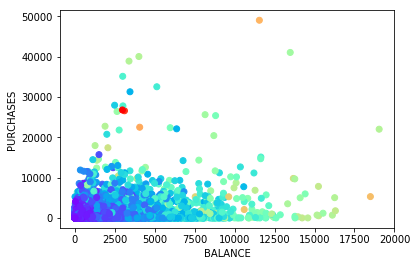

In [142]:
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.scatter(df['BALANCE'], df['PURCHASES'], c=df['CREDIT_LIMIT'], cmap='rainbow')

Text(0, 0.5, 'PAYMENTS')

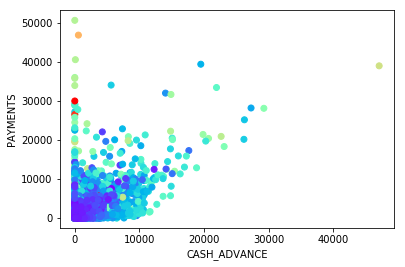

In [143]:
plt.scatter(df['CASH_ADVANCE'], df['PAYMENTS'], c=df['CREDIT_LIMIT'], cmap='rainbow')

plt.xlabel('CASH_ADVANCE')
plt.ylabel('PAYMENTS')

In [166]:
X = df.drop(['CUST_ID','Customer_Size','CASH_ADVANCE_TRX','PURCHASES_TRX','TENURE','Customer_Size','MINIMUM_PAYMENTS','CREDIT_LIMIT'], axis=1)
#, 'Customer_Size','CUST_ID','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','TENURE
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,201.802084,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4103.032597,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,622.066742,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,0.000000,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,678.334763,0.000000


In [163]:
X.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
PRC_FULL_PAYMENT                    float64
dtype: object

In [159]:
y = df['CREDIT_LIMIT'].copy()
y.head()

0    1000.0
1    7000.0
2    7500.0
3    7500.0
4    1200.0
Name: CREDIT_LIMIT, dtype: float64

In [157]:
kmeans = KMeans(n_clusters=4)


In [167]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [168]:
X.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
dtype: int64

In [169]:
print(kmeans.cluster_centers_)

[[8.07007858e+02 8.55690081e-01 7.15336017e+02 3.82613190e+02
  3.32998795e+02 3.70866734e+02 4.99188535e-01 1.86367052e-01
  3.71587891e-01 8.98359282e-02 1.01875702e+03 1.72473221e-01]
 [4.88637694e+03 9.74800184e-01 7.96534659e+02 4.70203121e+02
  3.26406022e+02 3.30379858e+03 3.66747812e-01 1.76715667e-01
  2.62530809e-01 3.47422963e-01 2.42942958e+03 1.52763473e-02]
 [5.40533094e+03 9.57954542e-01 2.72763638e+04 2.18771029e+04
  5.39926083e+03 1.55037839e+03 9.09027750e-01 8.42361167e-01
  7.20833292e-01 5.90277500e-02 2.79256345e+04 5.11205792e-01]
 [3.26377309e+03 9.18429210e-01 4.79597239e+03 3.15604714e+03
  1.64131364e+03 3.51791793e+03 7.04200728e-01 5.02084533e-01
  5.42310230e-01 2.11804969e-01 9.55096475e+03 2.58533319e-01]]


Text(0, 0.5, 'PURCHASE')

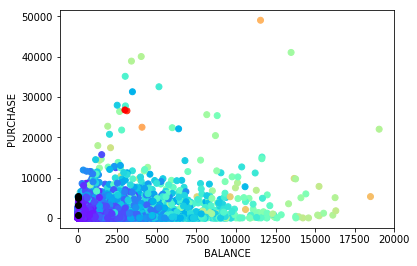

In [181]:
plt.scatter(df['BALANCE'], df['PURCHASES'], c=df['CREDIT_LIMIT'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')

plt.xlabel('BALANCE')
plt.ylabel('PURCHASE')

Text(0, 0.5, 'PAYMENTS')

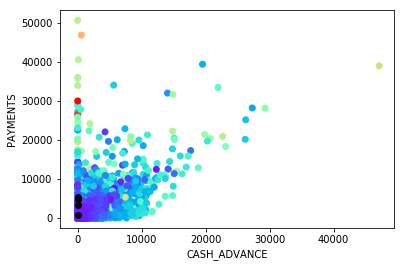

In [182]:
plt.scatter(df['CASH_ADVANCE'], df['PAYMENTS'], c=df['CREDIT_LIMIT'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')

plt.xlabel('CASH_ADVANCE')
plt.ylabel('PAYMENTS')

In [184]:
df['clusters'] = kmeans.labels_
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Customer_Size,clusters
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,1,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,0


Text(0, 0.5, 'PURCHASES')

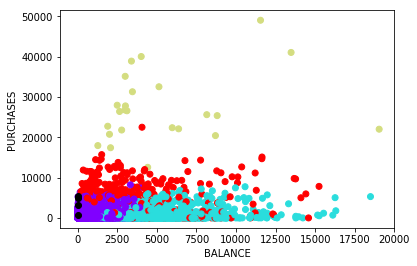

In [186]:
plt.scatter(df['BALANCE'], df['PURCHASES'], c=df['clusters'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')

plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')

Text(0, 0.5, 'PAYMENTS')

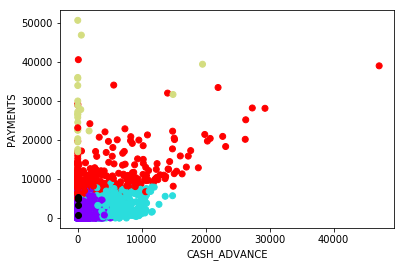

In [187]:
plt.scatter(df['CASH_ADVANCE'], df['PAYMENTS'], c=df['clusters'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')

plt.xlabel('CASH_ADVANCE')
plt.ylabel('PAYMENTS')

In [188]:
#new  data point
#BALANCE=7.2, PURCHASES=3.5, CASH_ADVANCE=0.8, PAYMENTS=1.6

point = [2500, 700, 6000, 622]

#predict category of new data point
#model thinks new data point belongs to setosa cluster (1)
print(kmeans.predict([point]))

ValueError: Incorrect number of features. Got 4 features, expected 12

In [ ]:
CONTINUE HERE

In [ ]:
group_names=['Micro','Small','Medium','Royal']

In [ ]:
print(kmeans.cluster_centers_)


In [ ]:
plt.scatter(df['feature1'],df['feature2'], c=df['category'], cmap= 'rainbow')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [ ]:
df['cluster'] = kmeans.labels_

In [ ]:
df.head()

In [ ]:
plt.scatter(df['feature1'],df['feature2'], c=df['cluster'], cmap= 'rainbow')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')